<a href="https://colab.research.google.com/github/mazon1/ML-Projects/blob/master/Pycaret_ML_End_to_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://towardsdatascience.com/a-beginners-guide-to-end-to-end-machine-learning-a42949e15a47

In [8]:
!pip install pycaret

In [9]:
#import libraries
import numpy as np

In [10]:
from pycaret.datasets import get_data

df = get_data('employee')

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
validation = df[~msk]
print(train.shape)
print(validation.shape)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


(12029, 10)
(2970, 10)


In [11]:

from pycaret.classification import *

exp_emp0 = setup(data = df, target = 'left', session_id=123)

,Description,Value
0,session_id,123
1,Target,left
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14999, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:

lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8895,0.9189,0.7920,0.7557,0.7734,0.7004,0.7008
1,0.8943,0.9301,0.7920,0.7704,0.7811,0.7114,0.7115
2,0.9105,0.9506,0.8240,0.8047,0.8142,0.7553,0.7554
3,0.8914,0.9191,0.8080,0.7537,0.7799,0.7080,0.7087
4,0.9190,0.9538,0.8360,0.8261,0.8310,0.7778,0.7778
5,0.8971,0.9389,0.8240,0.7630,0.7923,0.7241,0.7250
6,0.8990,0.9392,0.8160,0.7727,0.7938,0.7270,0.7275
7,0.9019,0.9394,0.7800,0.8025,0.7911,0.7270,0.7271
8,0.9105,0.9517,0.8120,0.8120,0.8120,0.7532,0.7532
9,0.8999,0.9426,0.8080,0.7799,0.7937,0.7277,0.7279


In [13]:
compare_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9888,0.9919,0.9612,0.9914,0.9760,0.9687,0.9689,0.975
lightgbm,Light Gradient Boosting Machine,0.9859,0.9929,0.9536,0.9868,0.9698,0.9606,0.9609,0.203
et,Extra Trees Classifier,0.9829,0.9907,0.9552,0.9723,0.9637,0.9524,0.9525,0.930
dt,Decision Tree Classifier,0.9770,0.9713,0.9604,0.9443,0.9522,0.9371,0.9372,0.066
gbc,Gradient Boosting Classifier,0.9765,0.9882,0.9292,0.9708,0.9495,0.9342,0.9346,0.979
ada,Ada Boost Classifier,0.9599,0.9824,0.9068,0.9236,0.9150,0.8888,0.8889,0.387
knn,K Neighbors Classifier,0.9335,0.9684,0.9016,0.8334,0.8660,0.8219,0.8232,0.178
lr,Logistic Regression,0.9013,0.9384,0.8092,0.7841,0.7963,0.7312,0.7315,0.639
ridge,Ridge Classifier,0.8850,0.0000,0.8080,0.7361,0.7701,0.6937,0.6953,0.036
lda,Linear Discriminant Analysis,0.8836,0.9302,0.8420,0.7184,0.7751,0.6973,0.7015,0.070


In [15]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9914,0.9906,0.9800,0.9839,0.9820,0.9763,0.9763
1,0.9886,0.9913,0.9600,0.9917,0.9756,0.9681,0.9684
2,0.9905,0.9977,0.9720,0.9878,0.9798,0.9736,0.9737
3,0.9867,0.9916,0.9520,0.9917,0.9714,0.9627,0.9631
4,0.9905,0.9932,0.9680,0.9918,0.9798,0.9735,0.9737
5,0.9886,0.9938,0.9520,1.0000,0.9754,0.9680,0.9685
6,0.9924,0.9955,0.9760,0.9919,0.9839,0.9789,0.9789
7,0.9819,0.9854,0.9400,0.9833,0.9611,0.9494,0.9498
8,0.9914,0.9921,0.9640,1.0000,0.9817,0.9761,0.9764
9,0.9857,0.9884,0.9480,0.9916,0.9693,0.9600,0.9604


In [16]:
tuned_rf = tune_model(rf, optimize='MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9762,0.9731,0.9240,0.9747,0.9487,0.9332,0.9337
1,0.9762,0.9752,0.9200,0.9787,0.9485,0.9330,0.9337
2,0.9857,0.9858,0.9600,0.9796,0.9697,0.9604,0.9604
3,0.9695,0.9739,0.9120,0.9580,0.9344,0.9146,0.9151
4,0.9819,0.9871,0.9560,0.9676,0.9618,0.9499,0.9499
5,0.9714,0.9761,0.9080,0.9701,0.9380,0.9195,0.9203
6,0.9695,0.9760,0.9120,0.9580,0.9344,0.9146,0.9151
7,0.9705,0.9668,0.9040,0.9700,0.9358,0.9167,0.9176
8,0.9810,0.9830,0.9280,0.9915,0.9587,0.9463,0.9472
9,0.9771,0.9726,0.9360,0.9669,0.9512,0.9363,0.9365


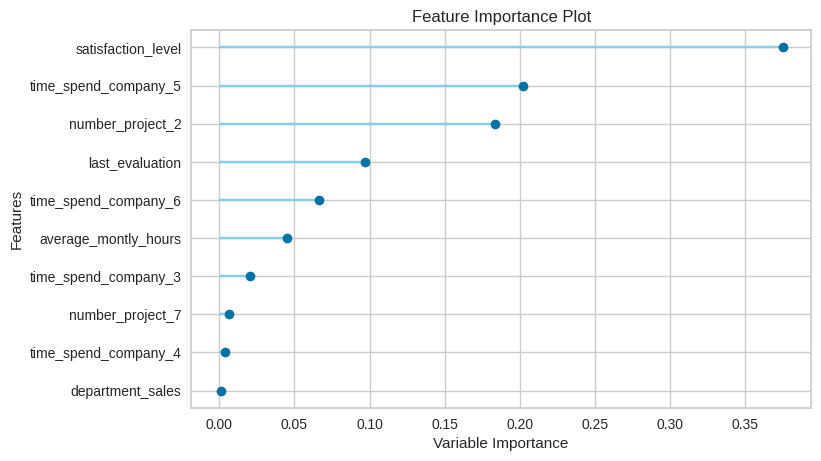

In [17]:
plot_model(tuned_rf, plot='feature')

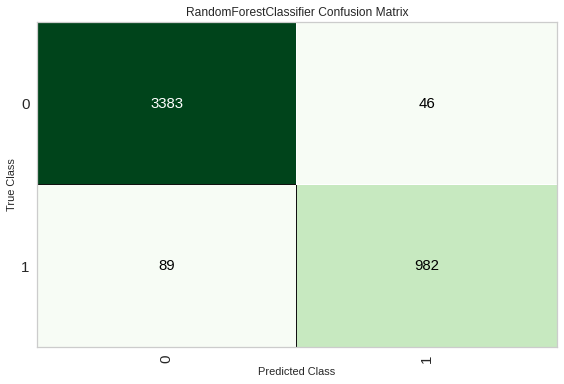

In [18]:
plot_model(tuned_rf, plot = 'confusion_matrix')